<a href="https://colab.research.google.com/github/nick01as/Gazer/blob/main/Machine_Learning_Stargazing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import joblib

data = pd.read_csv("AllData.csv")

data = data.drop(columns = ['Unnamed: 0'])




In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

y = data['SQM']
X = data.drop(columns = ['SQM'])


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)

train_data = X_train.join(y_train)

train_data['SQM'] = train_data['SQM']
train_data['AQ'] = train_data['AQ']

X_train, y_train = train_data.drop(columns = ['SQM','City','Date']), train_data['SQM']

reg = LinearRegression()

reg.fit(X_train.values,y_train.values)

test_data = X_test.join(y_test)

test_data['SQM'] = np.log(test_data['SQM'] + 1)
test_data['AQ'] = np.log(test_data['AQ'] + 1)

X_test, y_test = test_data.drop(columns = ['SQM','City','Date']), test_data['SQM']

print(reg.predict(np.array([[3, 48]])))

filename = "model.joblib"
joblib.dump(reg, filename)

[19.38754686]


['model.joblib']

<ipython-input-79-3b770e0af336>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()
<ipython-input-79-3b770e0af336>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(),annot = True, cmap = "YlGnBu")


<Axes: >

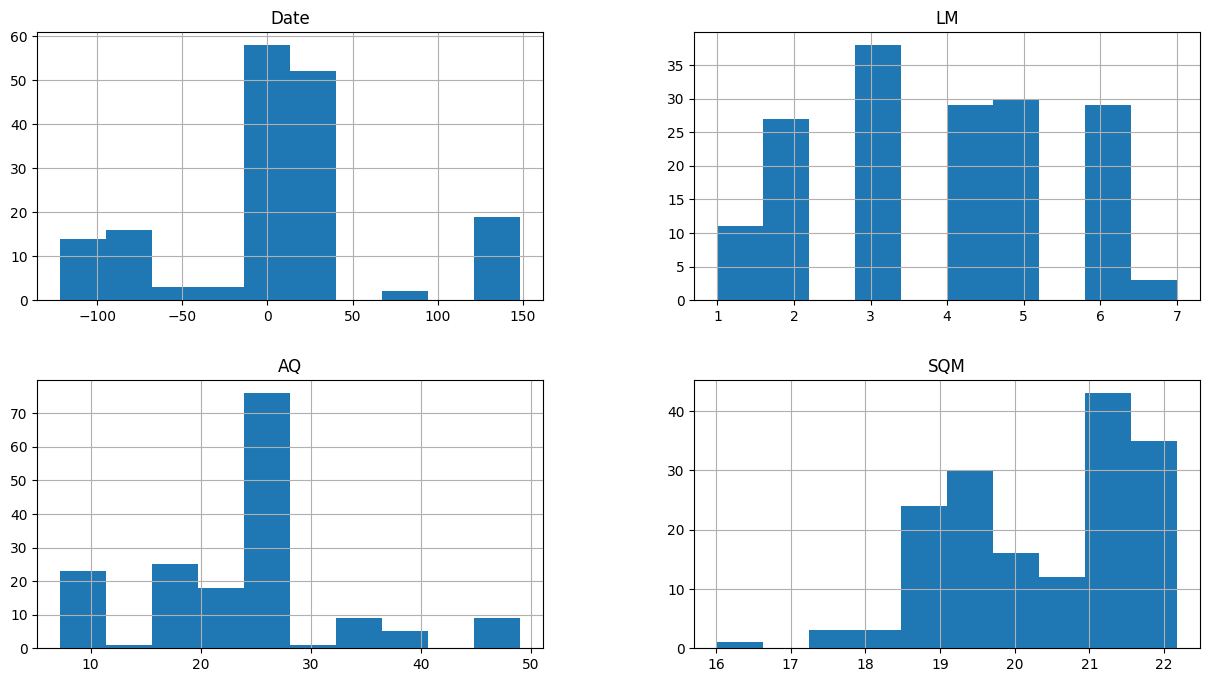

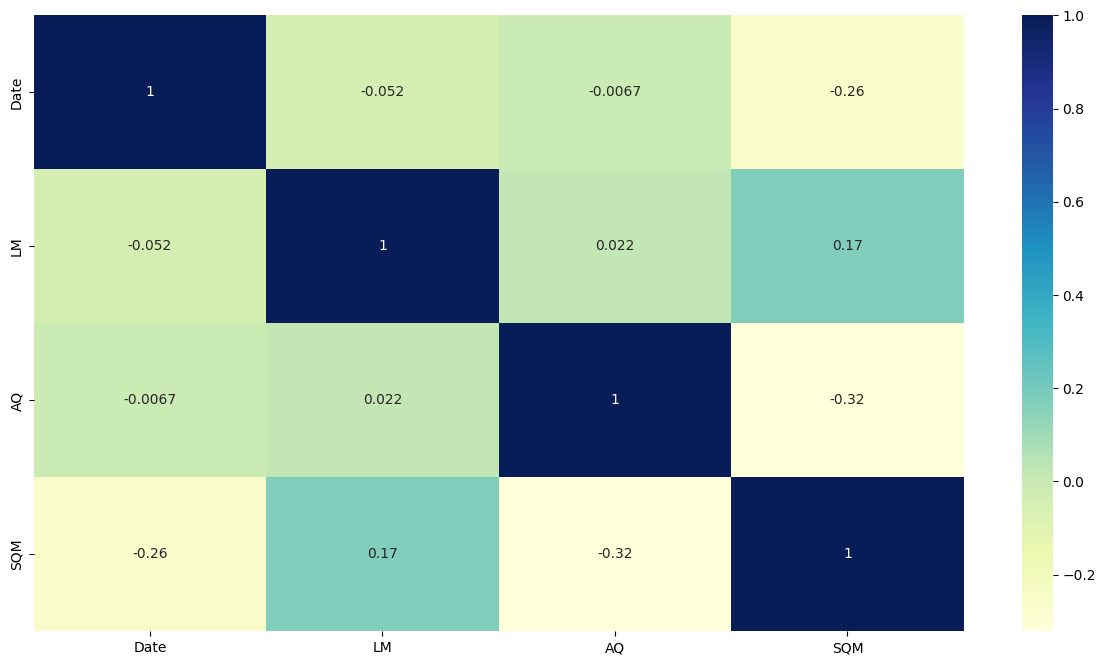

In [ ]:
train_data.hist(figsize=(15,8))
train_data.corr()
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(),annot = True, cmap = "YlGnBu")

array([[<Axes: title={'center': 'Date'}>, <Axes: title={'center': 'LM'}>],
       [<Axes: title={'center': 'AQ'}>, <Axes: title={'center': 'SQM'}>]],
      dtype=object)

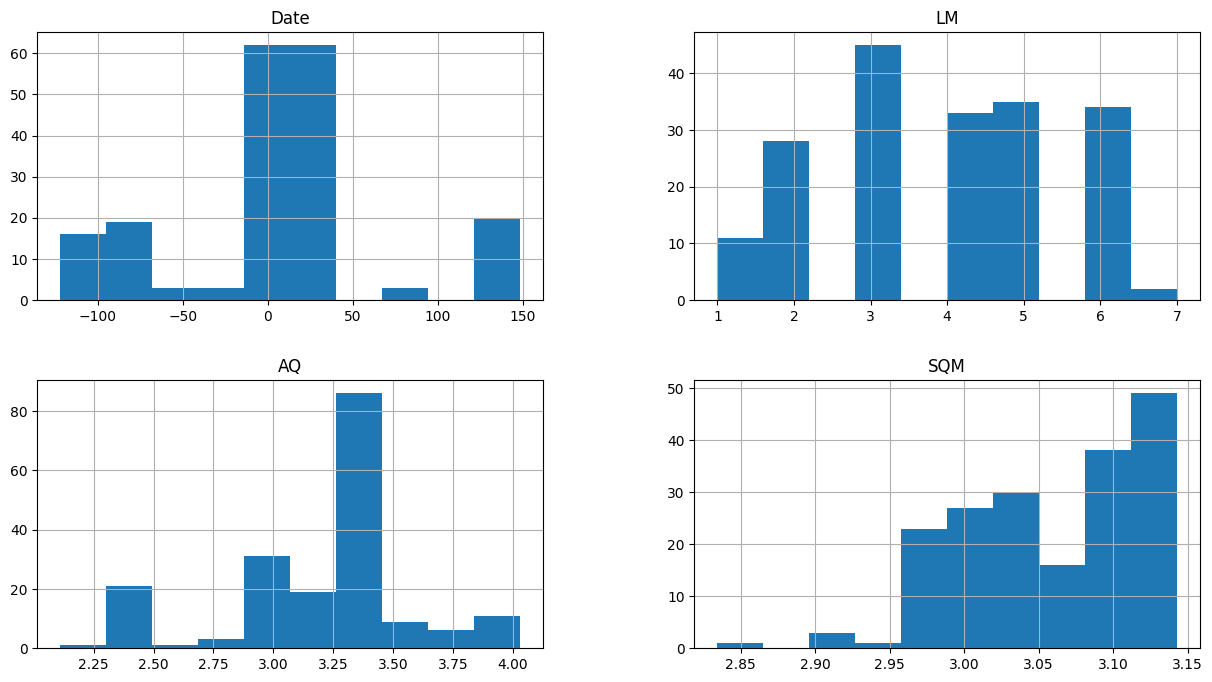

In [ ]:
train_data.hist(figsize=(15,8))